In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

### Extract labels and image data

In [17]:
import tensorflow as tf
import os
import glob
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np
from keras.preprocessing.image import img_to_array, load_img
from keras.layers.normalization import BatchNormalization

In [18]:
# Convert the label from .csv files to numpy array
# for train label
train_label = pd.read_csv(r'') #Path for training label.csv file
label_list = train_label.values.tolist()
for j in label_list: 
    del j[0]
label_list = np.array(label_list)
print(label_list.shape)

# for validation label
validation_label = pd.read_csv(r'') #Path for validation_label.csv file
valid_label_list = validation_label.values.tolist()
for k in valid_label_list: 
    del k[0]
valid_label_list = np.array(valid_label_list)
print(valid_label_list.shape)

# for validation label
test_label = pd.read_csv(r'') #Path for test_label.csv file
test_label_list = test_label.values.tolist()
for k in test_label_list: 
    del k[0]
test_label_list = np.array(test_label_list)
print(test_label_list.shape)

(1915, 1)
(507, 1)
(1002, 1)


**Load and process the images from train data**

In [19]:
# load the image from train data
img_dir = r"" #Image path for cropped and resized images
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 

img_array = []

for i in files:
    img = load_img(i)
    img_array.append(img_to_array(img))
    
img_array = np.array(img_array)    
print(img_array.shape)
# Normalize data in the numppy array
img_array = img_array/255.0
print(len(img_array))

(1915, 32, 32, 3)
1915


**Load and process the images from validation data**

In [20]:
# load the image from validation data
v_img_dir = r"" #Image path for validation cropped and resized images
v_data_path = os.path.join(v_img_dir,'*g') 
v_files = glob.glob(v_data_path) 

v_img_array = []

for o in v_files:
    v_img = load_img(o)
    v_img_array.append(img_to_array(v_img))
    
v_img_array = np.array(v_img_array)    

print(v_img_array.shape)
# Normalize data in the numppy array
v_img_array = v_img_array/255.0
print(len(v_img_array))

(507, 32, 32, 3)
507


**Load and process the images from test data**

In [21]:
# load the image from test data
t_img_dir = r"" #Image path for test cropped and resized images
t_data_path = os.path.join(t_img_dir,'*g') 
t_files = glob.glob(t_data_path) 

t_img_array = []
tcount = 0

for p in t_files:
    t_img = load_img(p)
    t_img_array.append(img_to_array(t_img))
    tcount += 1
t_img_array = np.array(t_img_array)    
print(tcount)
print(t_img_array.shape)
# Normalize data in the numppy array
t_img_array = t_img_array/255.0
print(len(t_img_array))

1002
(1002, 32, 32, 3)
1002


In [22]:
# Design a sequential CNN model
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (2, 2), activation='relu'))
model.add(layers.Conv2D(16, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='softmax'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 5, 16)          1040      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 5, 5, 16)          272       
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)              

In [23]:
# Compile the model with 'SGD' optimizer and sparse_categorical_crossentropy loss function
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# Train the model
history = model.fit(img_array, label_list, epochs=50, validation_data=(v_img_array, valid_label_list))
model.save(r'C:\Code\final code') # Path to save the trained model

Epoch 1/50
60/60 [==============================] - 1s 10ms/step - loss: 0.6038 - accuracy: 0.6961 - val_loss: 1.1959 - val_accuracy: 0.0907
Epoch 2/50
60/60 [==============================] - 1s 10ms/step - loss: 0.6024 - accuracy: 0.6961 - val_loss: 1.1909 - val_accuracy: 0.0907
Epoch 3/50
60/60 [==============================] - 1s 10ms/step - loss: 0.6008 - accuracy: 0.6961 - val_loss: 1.2393 - val_accuracy: 0.0907
Epoch 4/50
60/60 [==============================] - 1s 9ms/step - loss: 0.5990 - accuracy: 0.6961 - val_loss: 1.2415 - val_accuracy: 0.0907
Epoch 5/50
60/60 [==============================] - 1s 9ms/step - loss: 0.5967 - accuracy: 0.6961 - val_loss: 1.2871 - val_accuracy: 0.0907
Epoch 6/50
60/60 [==============================] - 1s 10ms/step - loss: 0.5950 - accuracy: 0.6961 - val_loss: 1.3464 - val_accuracy: 0.0907
Epoch 7/50
60/60 [==============================] - 1s 10ms/step - loss: 0.5927 - accuracy: 0.6961 - val_loss: 1.3073 - val_accuracy: 0.0907
Epoch 8/50
60/6

### Evaluate the model

32/32 - 0s - loss: 1.9191 - accuracy: 0.0938
Test Loss : 1.9191396236419678 and test accuracy : 0.09381237626075745


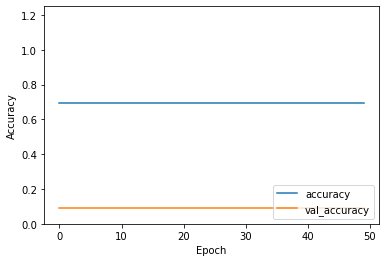

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.25])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(t_img_array,  test_label_list, verbose=2)
print("Test Loss : " + str(test_loss) + " and test accuracy : " + str(test_acc))